### 네이버 특정 뉴스 데이터 수집 실습
 - 뉴스 제목과 내용을 수집할 예정!
 - HTTP 구조 -> Header(헤더)

In [12]:
import requests as req
from bs4 import BeautifulSoup as bs
h = {
"user-agent":"Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/110.0.0.0 Safari/537.36"

}

In [13]:
# 뉴스 페이지 주소 가져오기 
url = 'https://n.news.naver.com/mnews/article/003/0011704345?sid=105'

# req를 이용해 웹페이지의 데이터를 가져올꺼임 
res = req.get(url,headers = h)

In [14]:
res.text

'<!doctype html>\n<html lang="ko" data-useragent="Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/110.0.0.0 Safari/537.36">\n\t<head>\n\t\t<meta charset="utf-8">\n\t\t<meta http-equiv="X-UA-Compatible" content="IE=edge">\n\t\t<meta name="viewport" content="width=device-width, initial-scale=1.0, maximum-scale=1.0, minimum-scale=1.0, user-scalable=no" />\n\t\t<meta property="og:title" content="&quot;소아과 의사 왜 부족?&quot; 질문에…챗GPT 기승전결  답변">\n\t\t<meta property="og:type" content="article">\n\t\t<meta property="og:url" content="https://n.news.naver.com/mnews/article/003/0011704345?sid&#x3D;105">\n\t\t<meta property="og:image" content="https://imgnews.pstatic.net/image/003/2023/02/22/NISI20230221_0001200976_web_20230221182548_20230222140112052.jpg?type&#x3D;w800">\n\t\t<meta property="og:description" content="기사내용 요약 챗GPT 소아과 의사 부족·간호법 대답 척척 같은 문장 기계적 반복·두루뭉술한 답변도 챗GPT 2021년까지 웹데이터로 훈련 받아 2021년 이후 사건·정보 대화 반영 잘 못해 &quot;틀린 내용 말할 가능성">\n\t\t<meta property

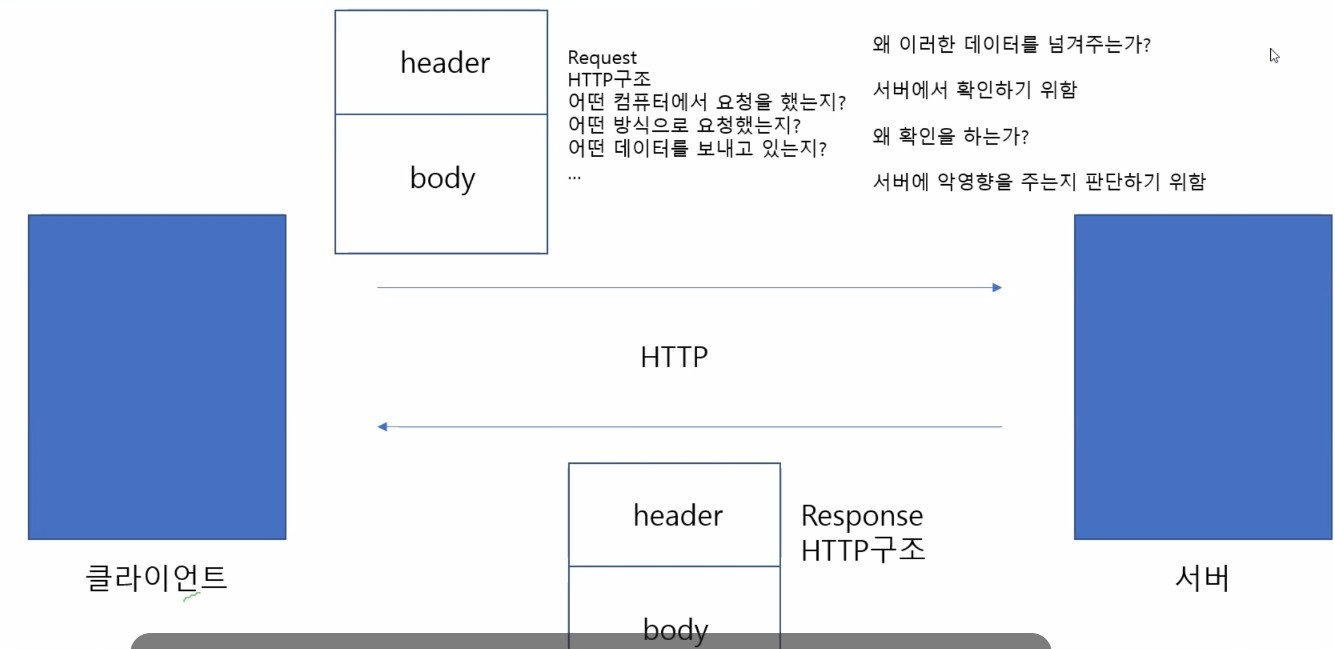

In [15]:
# 네트워크 -> f5누르면 다시 돌아가면서 얼마나 이 내용을 사용했는지 그 기록을 보여줌
# 그리고 맨 위 0011~ 이거 누르면 맨 아래보면 user-agent 를 보면 윈도우~~이거 확인

In [16]:
# HTML데이터 -> python 객체로 변환
html = bs(res.text,'lxml')

### 데이터를 접근할때 생각해야하는 요소
1. 접근할 컨텐츠를 감싸고 있는 태그의 id or class속성이 있는지 확인
- id와 class 속성이 모두 있을 경우 id속성을 우선으로 선택
- 가급적 태그 선택자를 이용하는 것은 지양

2. id나 class 속성이 없을 경우 계층 구조로 선택
- 해당 요소의 부모요소를 확인해서 id or class 속성 확인

In [17]:
# 실습 . 뉴스 제목과 내용을 가진 요소를 선택한 후 
# 각 요소의 내용을 출력하기!
html.select_one('#title_area').text

'"소아과 의사 왜 부족?" 질문에…챗GPT 기승전결  답변'

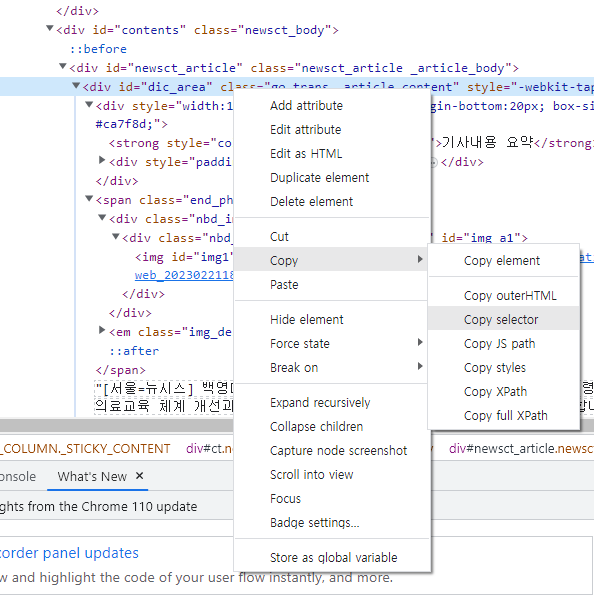

In [21]:
dicList = html.select('#dic_area')

for dic in dicList :
    print(dic.text.strip())

기사내용 요약챗GPT 소아과 의사 부족·간호법 대답 척척같은 문장 기계적 반복·두루뭉술한 답변도챗GPT 2021년까지 웹데이터로 훈련 받아2021년 이후 사건·정보 대화 반영 잘 못해"틀린 내용 말할 가능성…지나친 신뢰 금물"



[서울=뉴시스]"소아청소년과 의사 부족 문제에 대해 말해줘"라는 질문에 챗GPT가 답변한 내용. (사진= 뉴시스DB) 2023.02.21. photo@newsis.com[서울=뉴시스] 백영미 기자 = "소아청소년과 의사 부족은 인구 증가와 노령화, 근무환경, 교육체계, 경제적 요인으로 발생합니다. 의료교육 체계 개선과 의료 직종의 근무환경 개선 등 다양한 조치가 필요합니다.""대한민국에는 간호법이 아직 제정돼 있지 않습니다. 간호사의 역할과 책임을 명확히 규정하고 간호사의 권리와 의무를 보장할 수 있는 간호법 제정이 필요합니다."석달 전 출시된 대화형 인공지능(AI) 채팅 로봇 ‘챗GPT’가 최근 보건의료 이슈에 대해 내놓은 답변이다. 챗GPT가 대답을 척척 하면서 의료계에서도 파장을 일으키고 있지만, 전문가들은 훈련된 데이터량의 한계로 최근의 사건이나 정보를 제대로 반영하지 못해 무조건적인 맹신은 경계해야 한다고 지적한다.22일 "소아청소년과 의사 부족 문제에 대해 말해줘"라는 질문에 챗GPT는 "소아청소년과 의사 부족이 전 세계적으로 큰 문제 중 하나"라면서 소청과 의사 부족 문제의 이유를 4가지로 나눠 설명했다. 챗GPT는 "인구의 증가와 노령화로 인해 의료 수요가 증가하고 의사 수급이 부족해지는 경향이 있다"면서 "의사의 근무환경, 교육체계, 경제적 요인으로 인해 많은 지역에서 의사 부족 문제가 발생하고 있다"고 답했다. 또 "의사 부족은 의료 서비스 제공에 영향을 미치며 급박한 상황에서 의료 서비스를 제공하기 어려울 수 있다"면서 "의료 교육 체계 개선과 의료 직종의 근무 환경 개선 등 다양한 조치가 필요하다"고 말했다. 



[서울=뉴시스]"대한민국에 간호법이 필요한가요"라는 물음에 챗GPT가 답변한 내용. (사진= 대

In [23]:
# 이렇게도 가능
html.select_one('#title_area > span').text  # 가급적 태그 선택자 이용은 지양
html.select_one('#dic_area').text.strip()

'기사내용 요약챗GPT 소아과 의사 부족·간호법 대답 척척같은 문장 기계적 반복·두루뭉술한 답변도챗GPT 2021년까지 웹데이터로 훈련 받아2021년 이후 사건·정보 대화 반영 잘 못해"틀린 내용 말할 가능성…지나친 신뢰 금물"\n\n\n\n[서울=뉴시스]"소아청소년과 의사 부족 문제에 대해 말해줘"라는 질문에 챗GPT가 답변한 내용. (사진= 뉴시스DB) 2023.02.21. photo@newsis.com[서울=뉴시스] 백영미 기자 = "소아청소년과 의사 부족은 인구 증가와 노령화, 근무환경, 교육체계, 경제적 요인으로 발생합니다. 의료교육 체계 개선과 의료 직종의 근무환경 개선 등 다양한 조치가 필요합니다.""대한민국에는 간호법이 아직 제정돼 있지 않습니다. 간호사의 역할과 책임을 명확히 규정하고 간호사의 권리와 의무를 보장할 수 있는 간호법 제정이 필요합니다."석달 전 출시된 대화형 인공지능(AI) 채팅 로봇 ‘챗GPT’가 최근 보건의료 이슈에 대해 내놓은 답변이다. 챗GPT가 대답을 척척 하면서 의료계에서도 파장을 일으키고 있지만, 전문가들은 훈련된 데이터량의 한계로 최근의 사건이나 정보를 제대로 반영하지 못해 무조건적인 맹신은 경계해야 한다고 지적한다.22일 "소아청소년과 의사 부족 문제에 대해 말해줘"라는 질문에 챗GPT는 "소아청소년과 의사 부족이 전 세계적으로 큰 문제 중 하나"라면서 소청과 의사 부족 문제의 이유를 4가지로 나눠 설명했다. 챗GPT는 "인구의 증가와 노령화로 인해 의료 수요가 증가하고 의사 수급이 부족해지는 경향이 있다"면서 "의사의 근무환경, 교육체계, 경제적 요인으로 인해 많은 지역에서 의사 부족 문제가 발생하고 있다"고 답했다. 또 "의사 부족은 의료 서비스 제공에 영향을 미치며 급박한 상황에서 의료 서비스를 제공하기 어려울 수 있다"면서 "의료 교육 체계 개선과 의료 직종의 근무 환경 개선 등 다양한 조치가 필요하다"고 말했다. \n\n\n\n[서울=뉴시스]"대한민국에 간호법이 필요한가요"라는 물음에 챗GPT가 답변한 내